## Here is an example comparing pyDFCSR results with CSRtrack
### CSRtrack starts from t = 0.0 m, while pyDFCSR starts from t = 0 m

In [1]:
%matplotlib widget 
import sys
sys.path.insert(0,'../../')
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import h5py
from deposit import histogram_cic_2d
from pmd_beamphysics import ParticleGroup

In [322]:
#datafolder_CSRtrack = r'/sdf/data/ad/ard/u/jytang/pyDFCSR/chicane_output/out'
#datafolder_pyDFCSR  =  r'/sdf/data/ad/ard/u/jytang/pyDFCSR/chicane_output/chicane-2024-05-31T16_07_27-07_00'

datafolder_CSRtrack = r'G:\My Drive\Stanford\research\FEL\CSR\CSRtrack\benchmark_chicane_2024\out'
datafolder_pyDFCSR  = r'..\output\chicane-2024-06-17T02_07_49-07_00'

## Load CSRtrack Data

In [338]:
data = np.loadtxt(datafolder_CSRtrack + '/chicane_0069.fmt3')
z = data[1:, 4]
delta = data[1:, 5]
Q = data[1:, 6]
x = data[1:, 0]
xp = data[1:, 1]
t = data[0,0]
gam0 = data[0,1]
fz = data[1:, 7]
fx = data[1:, 8]

print("Plotting at z=", t)

x -= np.mean(x)
z -= np.mean(z)
n = z.shape[0]
sig_x = np.std(x)
sig_z = np.std(z)
print('sig_x = ', sig_x )
print('sig_z = ', sig_z)

Plotting at z= 7.3189148207092
sig_x =  0.0018855563837346617
sig_z =  5.243911575608002e-05


## Load pyDFCSR data

In [339]:
wake_filename = datafolder_pyDFCSR + "-wakes.h5"
with h5py.File(wake_filename, "r") as f:
    print(f.keys())

<KeysViewHDF5 ['step_1', 'step_12', 'step_127', 'step_128', 'step_129', 'step_130', 'step_131', 'step_132', 'step_133', 'step_17', 'step_2', 'step_22', 'step_27', 'step_3', 'step_32', 'step_37', 'step_4', 'step_42', 'step_47', 'step_5', 'step_57', 'step_58', 'step_59', 'step_6', 'step_60', 'step_61', 'step_62', 'step_63', 'step_64', 'step_65', 'step_66', 'step_67', 'step_68', 'step_69', 'step_7', 'step_70', 'step_71', 'step_72', 'step_73', 'step_74', 'step_75', 'step_76', 'step_77', 'step_82', 'step_87', 'step_92']>


In [348]:
 
wake_filename = datafolder_pyDFCSR + "-wakes.h5"
step = 'step_75'
with h5py.File(wake_filename, "r") as f:
    print("t =  {}".format(f[step].attrs['position']))
    print("ebeam energy {}".format(f[step].attrs['beam_energy']))
    dE_dct = np.array(f[step]['longitudinal']['dE_dct'])
    unit = f[step]['longitudinal'].attrs['unit']

    x_grids = np.array(f[step]['longitudinal']['x_grids']).reshape(dE_dct.shape)
    z_grids = np.array(f[step]['longitudinal']['z_grids']).reshape(dE_dct.shape)

    xkicks = np.array(f[step]['transverse']['xkicks'])



t =  7.499999999999999
ebeam energy 5000000026.315029


In [349]:
particle_filename = datafolder_pyDFCSR +"-particles-end.h5"
pg = ParticleGroup(particle_filename)
x2 = pg.x
xp2 = pg.xp
y2 = pg.y
yp2 = pg.yp
z2 = pg.z
delta2 = pg.energy/pg['mean_energy'] - 1

In [350]:
stats_filename = datafolder_pyDFCSR +"-statistics.h5"
with h5py.File(stats_filename, "r") as f:
    print(f.keys())
    t2 = np.array(f['step_positions'])
    alpha_x2 = np.array(f['twiss']['alpha_x'])
    beta_x2 = np.array(f['twiss']['beta_x'])
    norm_emit_x2 = np.array(f['twiss']['norm_emit_x'])
    sigma_x2 = np.array(f['sigma_x'])
    sigma_z2 = np.array(f['sigma_z'])

<KeysViewHDF5 ['coords', 'mean_energy', 'mean_x', 'mean_z', 'n_vec', 'sigma_energy', 'sigma_x', 'sigma_z', 'slope', 'step_positions', 'tau_vec', 'twiss']>


## Plot the wakes

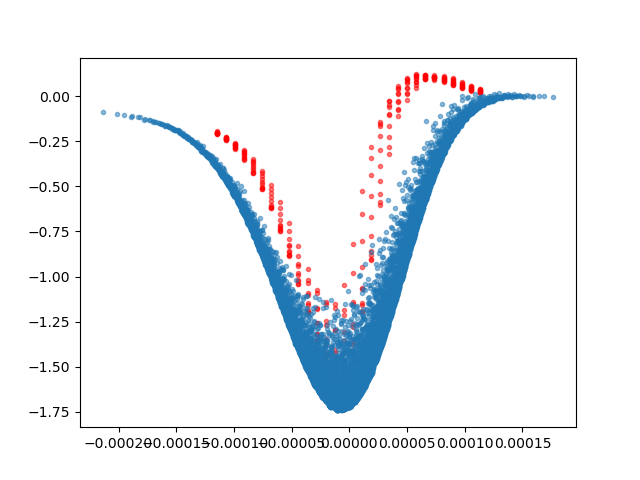

In [351]:
plt.figure()
plt.plot(z_grids, dE_dct, '.', alpha = 0.5, color = 'r')
plt.plot(z, fz/1e6, '.',alpha = 0.5)
plt.show()

In [352]:
nx = 10
nz = 30
xlim = 3
zlim = 3


meanx = np.mean(x)
meanz = np.mean(z)
x -= meanx
z -= meanz
n = z.shape[0]
sig_x = np.std(x)
sig_z = np.std(z)

xrange = np.linspace(meanx-xlim*sig_x, meanx+xlim*sig_x, nx)
zrange = np.linspace(meanz-zlim*sig_z, meanz+zlim*sig_z, nz)
xmesh, ymesh = np.meshgrid(xrange, zrange, indexing = 'ij')
fz_count = histogram_cic_2d(q1 = x, q2 = z, w = fz/1e6,
                     nbins_1 = nx, bins_start_1 = meanx-xlim*sig_x, bins_end_1 = meanx + xlim*sig_x,
                     nbins_2 = nz, bins_start_2 = meanz-zlim*sig_z, bins_end_2 = meanz + zlim*sig_z)
density_count = histogram_cic_2d(q1 = x, q2 = z, w = np.ones(z.shape),
                     nbins_1 = nx, bins_start_1 = meanx-xlim*sig_x, bins_end_1 = meanx + xlim*sig_x,
                     nbins_2 = nz, bins_start_2 = meanz-zlim*sig_z, bins_end_2 = meanz+ zlim*sig_z)
fz_bin = fz_count/density_count
#plot_surface(xrange, zrange, fz_bin)

C:\Users\yingb\AppData\Local\Temp\ipykernel_16028\978577780.py:24: RuntimeWarning: invalid value encountered in divide
  fz_bin = fz_count/density_count


AttributeError: 'tuple' object has no attribute '_edgecolor3d'

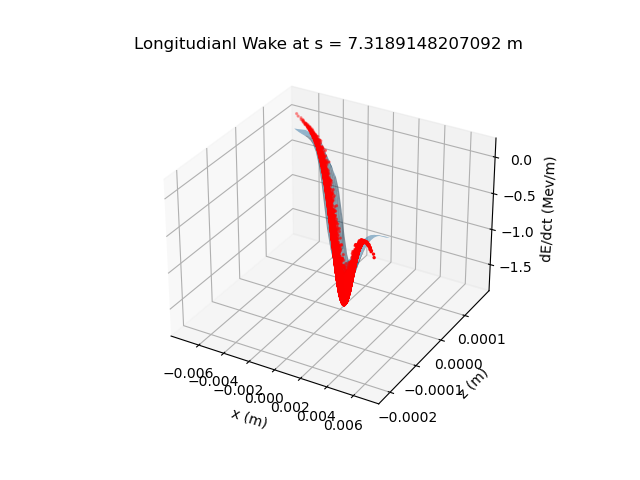

In [353]:
X, Y = x_grids, z_grids
Z = dE_dct

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf1 = ax.plot_surface(X, Y, Z, color ='C0', alpha = 0.5, label = 'pyDFCSR')

surf1._edgecolors2d = surf1._edgecolor3d
surf1._facecolors2d = surf1._facecolor3d
 
ax.set_title('3D Surface plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.set_ylim([-0.4e-5, 1e-5])
ax.scatter(x, z, fz/1e6, color='red', s=2)
#surf2 = ax.plot_surface(xmesh, ymesh, fz_bin, color ='C1', alpha = 0.5, label = 'CSRtrack')
ax.set_xlabel('x (m)')
ax.set_ylabel('z (m)')
ax.set_zlabel('dE/dct (Mev/m)')
ax.set_title('Longitudianl Wake at s = {} m'.format(t))

surf2._edgecolors2d = surf2._edgecolor3d
surf2._facecolors2d = surf2._facecolor3d

ax.azim = 190
ax.dist = 10
ax.elev = 30

ax.legend()
plt.tight_layout()
plt.show()


C:\Users\yingb\AppData\Local\Temp\ipykernel_16028\3412504301.py:9: RuntimeWarning: invalid value encountered in divide
  fx_bin = fx_count/density_count
C:\Users\yingb\AppData\Local\Temp\ipykernel_16028\3412504301.py:32: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10


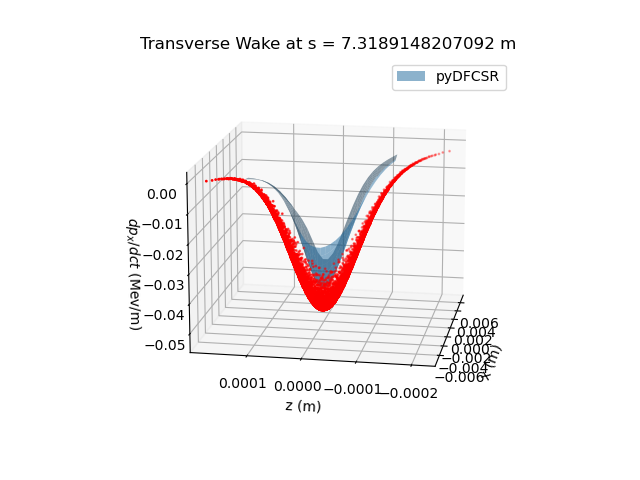

In [354]:
xrange = np.linspace(meanx-3*sig_x, meanx+3*sig_x, nx)
zrange = np.linspace(meanz-3*sig_z, meanz+3*sig_z, nz)
fx_count = histogram_cic_2d(q1 = x, q2 = z, w = fx/1e6,
                     nbins_1 = nx, bins_start_1 = meanx-3*sig_x, bins_end_1 = meanx + 3*sig_x,
                     nbins_2 = nz, bins_start_2 = meanz-3*sig_z, bins_end_2 = meanz + 3*sig_z)
density_count = histogram_cic_2d(q1 = x, q2 = z, w = np.ones(z.shape),
                     nbins_1 = nx, bins_start_1 = meanx-3*sig_x, bins_end_1 = meanx + 3*sig_x,
                     nbins_2 = nz, bins_start_2 = meanz-3*sig_z, bins_end_2 = meanz+ 3*sig_z)
fx_bin = fx_count/density_count

X, Y = x_grids, z_grids
Z = xkicks

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf1 = ax.plot_surface(X, Y, Z, color ='C0', alpha = 0.5, label = 'pyDFCSR')

surf1._edgecolors2d = surf1._edgecolor3d
surf1._facecolors2d = surf1._facecolor3d
 
ax.set_xlabel('x (m)')
ax.set_ylabel('z (m)')
ax.set_zlabel('$dp_x/dct$ (Mev/m)')
ax.set_title('Transverse Wake at s = {} m'.format(t))
ax.scatter(x, z, fx/1e6, color='red', s=1)
#surf2 = ax.plot_surface(xmesh, ymesh, fx_bin, color ='C1', alpha = 0.5, label = 'CSRtrack')

#surf2._edgecolors2d = surf2._edgecolor3d
#surf2._facecolors2d = surf2._facecolor3d

ax.azim = 190
ax.dist = 10
ax.elev = 15

ax.legend()

plt.show()

## Plot particles

Plotting at z= 14.012468160154
sig_x =  2.4196194805793208e-05
sig_z =  2.0469381098845342e-05


Text(0, 0.5, 'z(m )')

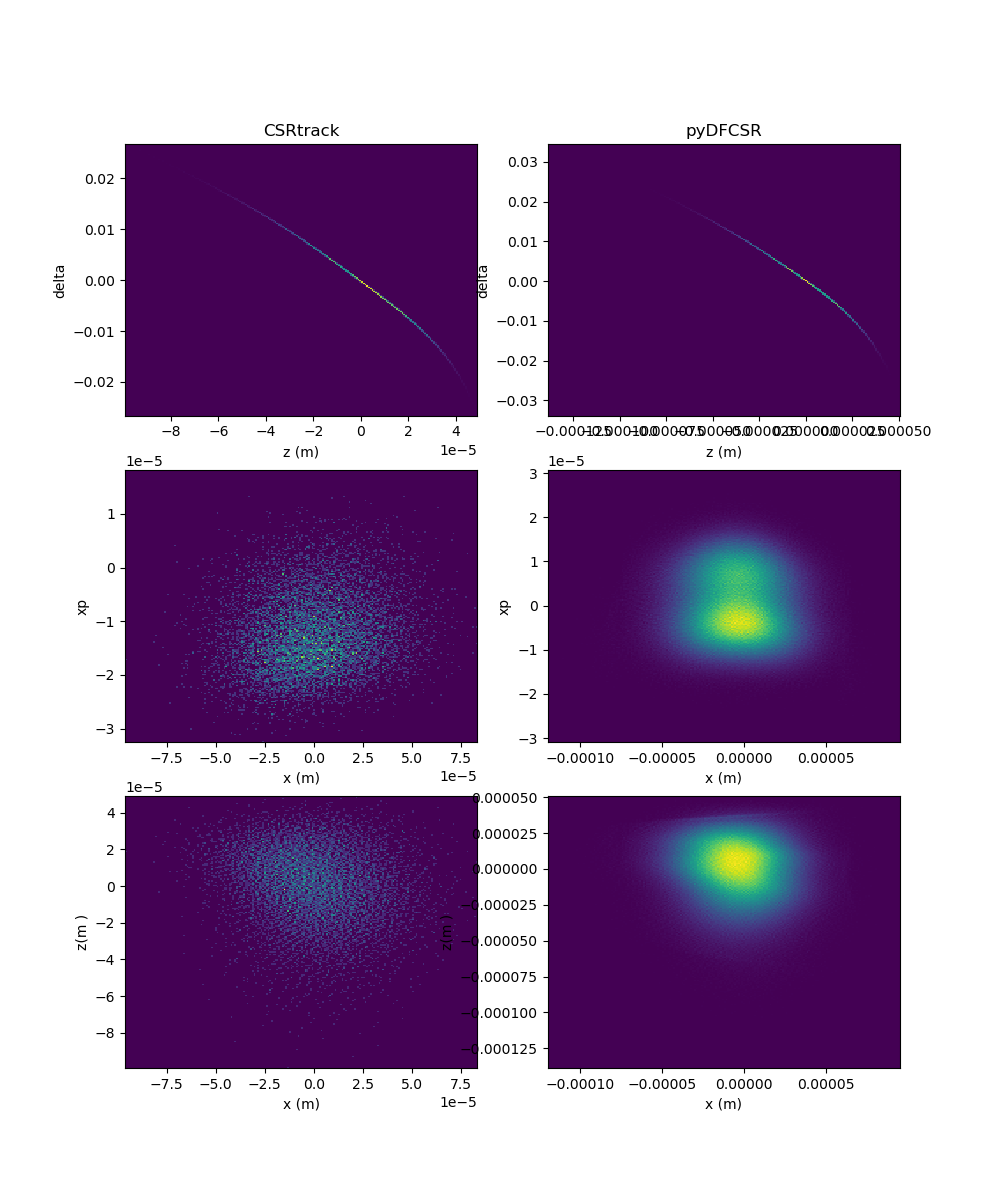

In [307]:

data = np.loadtxt(datafolder_CSRtrack + '/end.fmt3')
z = data[1:, 4]
delta = data[1:, 5]
Q = data[1:, 6]
x = data[1:, 0]
xp = data[1:, 1]
t = data[0,0]
gam0 = data[0,1]
fz = data[1:, 7]
fx = data[1:, 8]

print("Plotting at z=", t)

x -= np.mean(x)
z -= np.mean(z)
n = z.shape[0]
sig_x = np.std(x)
sig_z = np.std(z)
print('sig_x = ', sig_x )
print('sig_z = ', sig_z)


fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (10, 12))
axes[0, 0].set_title('CSRtrack')
axes[0, 1].set_title('pyDFCSR')
ax1 = axes[0,0]
ax2 = axes[0,1]
surf = ax1.hist2d(z, delta, bins = 200)
surf2 = ax2.hist2d(z2, delta2, bins = 200)
ax1.set_xlabel('z (m)')
ax1.set_ylabel('delta')
ax2.set_xlabel('z (m)')
ax2.set_ylabel('delta')

ax1 = axes[1,0]
ax2 = axes[1,1]
surf = ax1.hist2d(x, xp, bins = 200)
surf2 = ax2.hist2d(x2, xp2, bins = 200)
ax1.set_xlabel('x (m)')
ax1.set_ylabel('xp')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('xp')

ax1 = axes[2,0]
ax2 = axes[2,1]
surf = ax1.hist2d(x, z, bins = 200)
surf2 = ax2.hist2d(x2, z2, bins = 200)
ax1.set_xlabel('x (m)')
ax1.set_ylabel('z(m )')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('z(m )')

## Plot Statistics

In [256]:
from twiss import twiss_dispersion_calc
#slice emittance
#slice emittance
def get_slice_emittance(z, x, xp, delta, nbins = 100):
    zmean = np.mean(z)
    sigma_z = np.std(z)
    zrange = np.linspace(zmean - 3*sigma_z,zmean + 3*sigma_z, nbins + 1)
    emit_x = np.zeros((nbins,))
    for k in range(nbins):
        zmin = zrange[k]
        zmax = zrange[k + 1]
        ind = (z>=zmin) &(z < zmax)
        x_slice = x[ind]
        xp_slice = xp[ind]
        delta_slice= delta[ind]
        
        cov3 = np.cov([x_slice, xp_slice, delta_slice])
        twiss = twiss_dispersion_calc(cov3)
        
        emit_x_slice = twiss['emit']
        emit_x[k] = emit_x_slice
    
    zpos = (zrange[:-1] + zrange[1:])/2
    return zpos, emit_x
        

In [257]:
zpos1, emitX1 = get_slice_emittance(z, x, xp, delta,nbins = 50)
zpos2, emitX2 = get_slice_emittance(z2, x2, xp2, delta2, nbins = 50)

C:\Users\yingb\miniconda3\envs\pyDFCSR\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\yingb\miniconda3\envs\pyDFCSR\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\yingb\AppData\Local\Temp\ipykernel_16028\331245783.py:17: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov3 = np.cov([x_slice, xp_slice, delta_slice])
C:\Users\yingb\miniconda3\envs\pyDFCSR\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\yingb\miniconda3\envs\pyDFCSR\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Text(0, 0.5, 'emitX (m)')

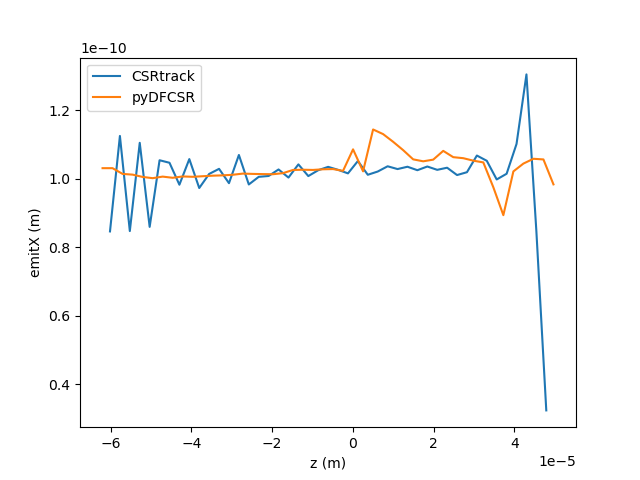

In [258]:
plt.figure()
plt.plot(zpos1, emitX1, label = 'CSRtrack')
plt.plot(zpos2, emitX2, label = 'pyDFCSR')
plt.legend()
plt.xlabel('z (m)')
plt.ylabel('emitX (m)')

## load all CSRtrack files

In [259]:

N = 123
CSRtrack_stats = {'t': np.zeros((N,)), 'sigma_x': np.zeros((N,)), 'sigma_z': np.zeros((N,)), 
                  'emit_x': np.zeros((N,)), 'norm_emit_x': np.zeros((N,)),
                  'beta_x': np.zeros((N,)), 'alpha_x': np.zeros((N,))}
for k in range(N):
    
    filename = 'chicane_{:04d}.fmt3'.format(k + 1)
    data = np.loadtxt(datafolder_CSRtrack + '/' + filename)
    z = data[1:, 4]
    delta = data[1:, 5]
    

    x = data[1:, 0]
    xp = data[1:, 1]

    t = data[0,0]
    gam0 = data[0,1]

    print("Loading at z=", t)


    sigma_x = np.std(x)
    sigma_z = np.std(z)
    
    cov3 = np.cov([x, xp, delta])
    twiss = twiss_dispersion_calc(cov3)
    twiss['norm_emit'] = twiss['emit'] * gam0
    
    
    CSRtrack_stats['t'][k] = t
    CSRtrack_stats['sigma_x'][k] = sigma_x
    CSRtrack_stats['sigma_z'][k] = sigma_z
    CSRtrack_stats['emit_x'][k] = twiss['emit']
    CSRtrack_stats['norm_emit_x'][k] = twiss['norm_emit']
    CSRtrack_stats['beta_x'][k] = twiss['beta']
    CSRtrack_stats['alpha_x'][k] = twiss['alpha']
    


Loading at z= 0.00089478804413947
Loading at z= 0.2054704184291
Loading at z= 0.31262908196409
Loading at z= 0.41978774549907
Loading at z= 0.50107738087575
Loading at z= 0.60072184810582
Loading at z= 0.7103307620589
Loading at z= 0.81993967601197
Loading at z= 0.92954858996505
Loading at z= 1.0391575039181
Loading at z= 1.1487664178712
Loading at z= 1.2583753318243
Loading at z= 1.3679842457773
Loading at z= 1.4775931597304
Loading at z= 1.5872020736835
Loading at z= 1.6968109876366
Loading at z= 1.8064199015896
Loading at z= 1.9160288155427
Loading at z= 2.0256377294958
Loading at z= 2.1352466434489
Loading at z= 2.2448555574019
Loading at z= 2.354464471355
Loading at z= 2.4640733853081
Loading at z= 2.5736822992612
Loading at z= 2.6832912132142
Loading at z= 2.7929001271673
Loading at z= 2.9025090411204
Loading at z= 3.0121179550735
Loading at z= 3.1217268690265
Loading at z= 3.2313357829796
Loading at z= 3.3409446969327
Loading at z= 3.4505536108858
Loading at z= 3.5601625248388
L

In [260]:
CSRtrack_stats.keys()

dict_keys(['t', 'sigma_x', 'sigma_z', 'emit_x', 'norm_emit_x', 'beta_x', 'alpha_x'])

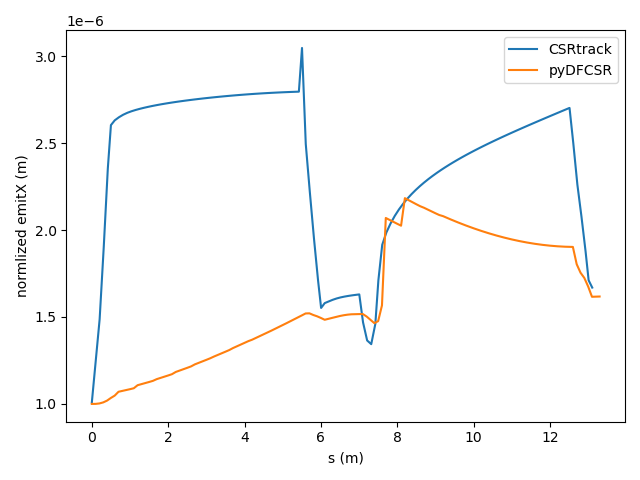

In [261]:
plt.figure()
plt.plot(CSRtrack_stats['t'], CSRtrack_stats['norm_emit_x'],label = 'CSRtrack')
plt.plot(t2 , norm_emit_x2, label = 'pyDFCSR')
plt.ylabel('normlized emitX (m)')
plt.legend()
plt.xlabel('s (m)')
plt.tight_layout()
plt.show()

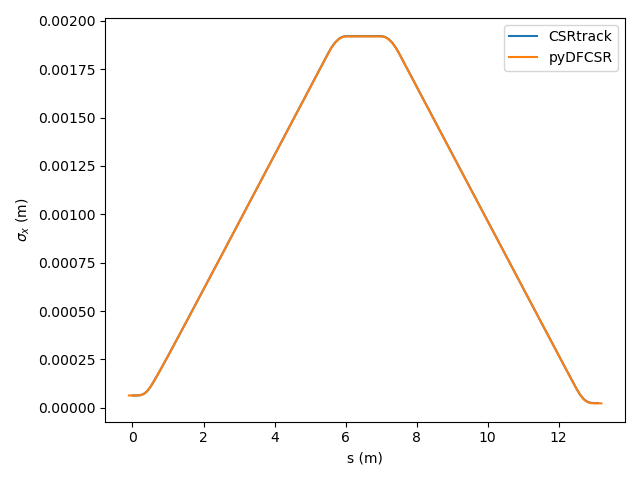

In [262]:
plt.figure()
plt.plot(CSRtrack_stats['t'], CSRtrack_stats['sigma_x'], label = 'CSRtrack')
plt.plot(t2 - 0.1, sigma_x2, label = 'pyDFCSR')
plt.xlabel('s (m)')
plt.ylabel('$\sigma_x$ (m)')
plt.tight_layout()
plt.legend()
plt.show()

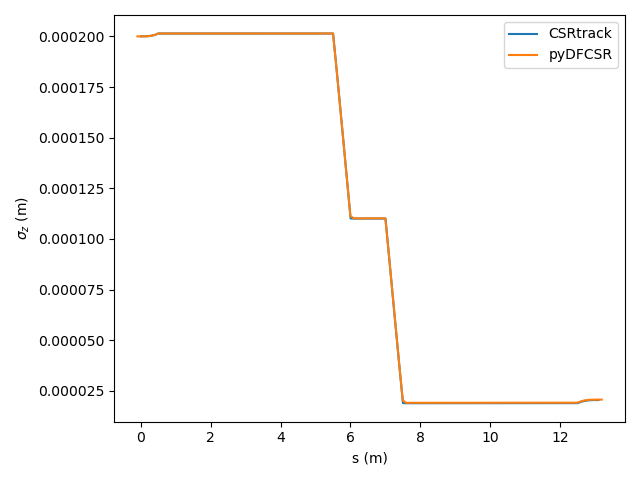

In [263]:
plt.figure()
plt.plot(CSRtrack_stats['t'], CSRtrack_stats['sigma_z'], label = 'CSRtrack')
plt.plot(t2 - 0.1, sigma_z2,label = 'pyDFCSR')
plt.xlabel('s (m)')
plt.ylabel('$\sigma_z$ (m)')
plt.tight_layout()
plt.legend()
plt.show()

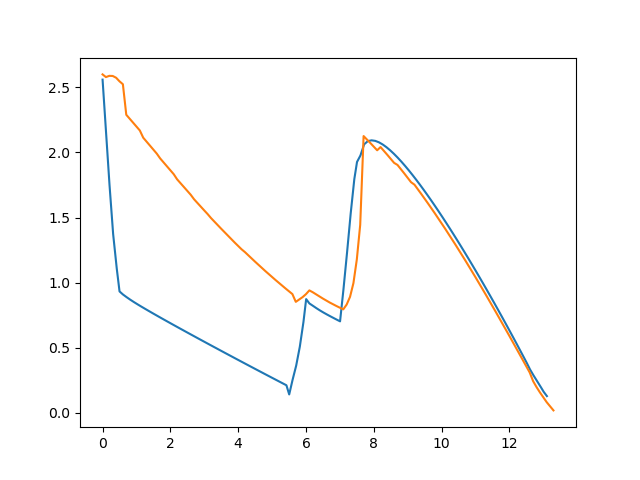

In [264]:
plt.figure()
plt.plot(CSRtrack_stats['t'], CSRtrack_stats['alpha_x'])
plt.plot(t2 , alpha_x2)
plt.show()

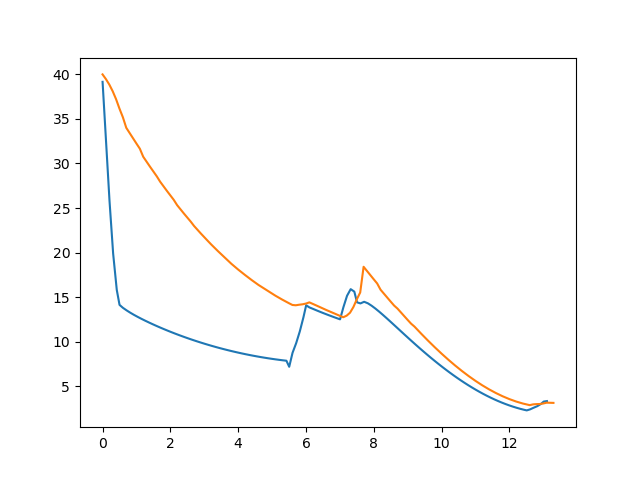

In [265]:
plt.figure()
plt.plot(CSRtrack_stats['t'], CSRtrack_stats['beta_x'])
plt.plot(t2, beta_x2)
plt.show()